In [1]:
import pandas as pd
import numpy as np
import ast
import pickle
import matplotlib.pyplot as plt


# Fncs to get the xlsx data in the right format
def string_to_float_tuple(string):
    # Convert the string to a tuple using ast.literal_eval
    tuple_str = ast.literal_eval(string)

    # Convert the elements of the tuple to floats
    float_tuple = tuple(float(element) for element in tuple_str)

    return float_tuple

# run this over the column colors
def get_cols_in_right_format(np_ar):
    jaw_cols = [string_to_float_tuple(v) for v in np_ar]
    jaw_sizes = []
    for col in jaw_cols:
        if(np.sum(col[:-1]) == 0):
            jaw_sizes.append(0.5)
        else:
            jaw_sizes.append(10)
    return(jaw_cols,jaw_sizes)



# load the grid layout

with open('./b3_layout.pkl','rb') as f:
    elec_layout = pickle.load(f)
two_d_coords = np.zeros((253,3))
ind = 0
for c in range(elec_layout.shape[1]):
    for i,r in enumerate(range(elec_layout.shape[0])):
        two_d_coords[ind,:] = [c,-i,elec_layout[r,c]]
        ind += 1
two_d_coords = two_d_coords[two_d_coords[:, 2].argsort(),:]
    



# load the grid heatmaps of artic movements 
grid_df = pd.read_excel('./fig1_sourcedata.xlsx',sheet_name='grid_maps',engine='openpyxl').iloc[:,1:-1]

# load the traces to plot underneath the grid heatmpas
tongue_panel = pd.read_excel('./fig1_sourcedata.xlsx',sheet_name='right_traces',engine='openpyxl').iloc[:,1:]
lips_panel = pd.read_excel('./fig1_sourcedata.xlsx',sheet_name='middle_traces',engine='openpyxl').iloc[:,1:]
jaw_panel = pd.read_excel('./fig1_sourcedata.xlsx',sheet_name='left_traces',engine='openpyxl').iloc[:,1:]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


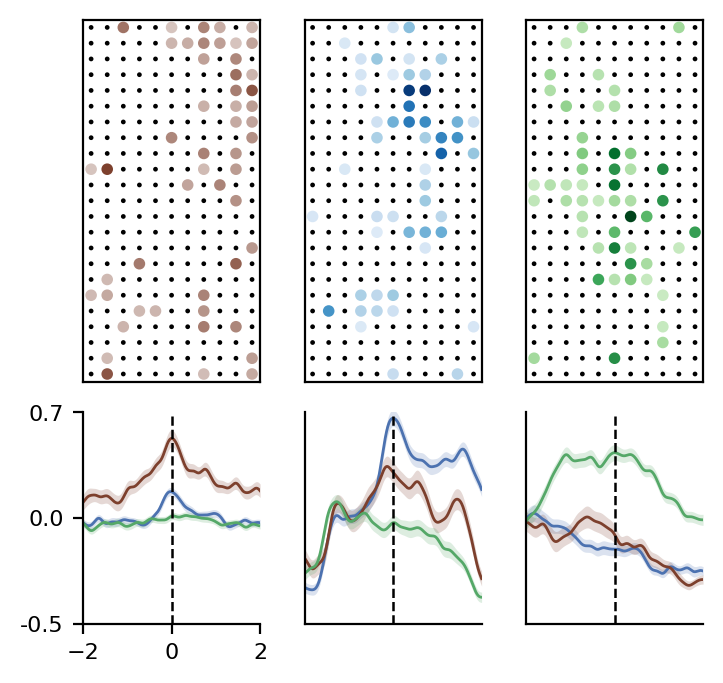

In [2]:
# Computes and plots the dendrogram
import seaborn as sns
from gimutil_plotting import setup_figure
# Specifies plot parameters
rows = {
    'grid_start' : 0,
    'grid_stop'  : 300,
    'erpbot_start': 325,
    'erpbot_stop' : 500,
    'total'      : 500,
    'erptop_start': 25,
    'erptop_stop' : 275
}
cols = {
    'mouth_start' : 0,
    'mouth_stop'  : 200,
    'lips_start' : 250,
    'lips_stop'  : 450,
    'tongue_start' : 500,
    'tongue_stop'  : 700,
    'erptongue_start': 475,
    'erptongue_stop': 650,
    'erpmouth_start': 75,
    'erpmouth_stop': 250,
    'erplips_start': 350,
    'erplips_stop': 525,
    'total'      : 700
}
all_panel_params = {
    'mouth' : {'row_and_col_spec' : ('grid', 'mouth')},
    'lips' : {'row_and_col_spec' : ('grid', 'lips')},
    'tongue' : {'row_and_col_spec' : ('grid', 'tongue')},
    'erpmouth'           : {'row_and_col_spec' : ('erpbot', 'mouth')},
    'erplips'           : {'row_and_col_spec' : ('erpbot', 'lips')},
    'erptongue'           : {'row_and_col_spec' : ('erpbot', 'tongue')}
}

# define font params
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 8})

# nice color pal
hex_col = sns.color_palette("deep", as_cmap=True)


# Creates the plot plotting_tools
fig, axs = setup_figure(
    all_panel_params=all_panel_params, row_specs=rows, col_specs=cols,
    figsize=(4,4) #6,6
)
plt.gcf().set_dpi(200)

# sampling rate and +/- 2 second pad on each side
fs = 200. 
pad = 2*fs

# time array
t = np.linspace(-pad/fs, pad/fs, num=int(pad*2))    



# make the electrode heat maps 
ax = axs['mouth']
jaw_cols,jaw_sizes = get_cols_in_right_format(grid_df.jaw.to_numpy())
ax.scatter(two_d_coords[:,0],two_d_coords[:,1],color=jaw_cols,s=jaw_sizes)
#ax.set_title('Jaw')
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylim([-22.5,0.5])
ax.set_xlim([-0.5,10.5])

ax = axs['lips']
lips_cols,lips_sizes = get_cols_in_right_format(grid_df.lips.to_numpy())
ax.scatter(two_d_coords[:,0],two_d_coords[:,1],color=lips_cols,s=lips_sizes)
#ax.set_title('Lips')
#ax.set_title('Lips back')
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylim([-22.5,0.5])
ax.set_xlim([-0.5,10.5])


ax = axs['tongue']
t_cols,t_sizes = get_cols_in_right_format(grid_df.tongue.to_numpy())
ax.scatter(two_d_coords[:,0],two_d_coords[:,1],color=t_cols,s=t_sizes)
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylim([-22.5,0.5])
ax.set_xlim([-0.5,10.5])


# plotting colors for traces to align with heatmpas 
jaw_col = '#7D402D'
lips_col = hex_col[0]
tongue_col = hex_col[2]

# make the traces
ax = axs['erplips']

ax.plot(t,lips_panel.lips_mean,color=lips_col,linewidth=1)
ax.fill_between(t,lips_panel.lips_mean + lips_panel.lips_sem,lips_panel.lips_mean - lips_panel.lips_sem,color=lips_col,alpha=0.2,linewidth=0)

ax.plot(t,lips_panel.jaw_mean,color=jaw_col,linewidth=1)
ax.fill_between(t,lips_panel.jaw_mean + lips_panel.jaw_sem,lips_panel.jaw_mean - lips_panel.jaw_sem,color=jaw_col,alpha=0.2,linewidth=0)

ax.plot(t,lips_panel.tongue_mean,color=tongue_col,linewidth=1)
ax.fill_between(t,lips_panel.tongue_mean + lips_panel.tongue_sem,lips_panel.tongue_mean - lips_panel.tongue_sem,color=tongue_col,alpha=0.2,linewidth=0)

# format the axis
ax.axvline(0,color='k',linestyle='dashed',linewidth=0.9)
ax.set_ylim([-0.5,0.7])
ax.set_xlim([-pad/fs,pad/fs])
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



ax = axs['erpmouth']


ax.plot(t,jaw_panel.lips_mean,color=lips_col,linewidth=1)
ax.fill_between(t,jaw_panel.lips_mean + jaw_panel.lips_sem,jaw_panel.lips_mean - jaw_panel.lips_sem,color=lips_col,alpha=0.2,linewidth=0)

ax.plot(t,jaw_panel.jaw_mean,color=jaw_col,linewidth=1)
ax.fill_between(t,jaw_panel.jaw_mean + jaw_panel.jaw_sem,jaw_panel.jaw_mean - jaw_panel.jaw_sem,color=jaw_col,alpha=0.2,linewidth=0)

ax.plot(t,jaw_panel.tongue_mean,color=tongue_col,linewidth=1)
ax.fill_between(t,jaw_panel.tongue_mean + jaw_panel.tongue_sem,jaw_panel.tongue_mean - jaw_panel.tongue_sem,color=tongue_col,alpha=0.2,linewidth=0)

ax.axvline(0,color='k',linestyle='dashed',linewidth=0.9)
ax.set_ylim([-0.5,0.7])
ax.set_xlim([-pad/fs,pad/fs])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([-0.7,0,0.7])

yticklabs =  ["{:.1f}".format(number) for number in [-0.5,0,0.7]]
ax.set_yticklabels(yticklabs)

ax.set_xticks([-pad/fs,0,pad/fs])



ax = axs['erptongue']

ax.plot(t,tongue_panel.lips_mean,color=lips_col,linewidth=1)
ax.fill_between(t,tongue_panel.lips_mean + tongue_panel.lips_sem,tongue_panel.lips_mean - tongue_panel.lips_sem,color=lips_col,alpha=0.2,linewidth=0)

ax.plot(t,tongue_panel.jaw_mean,color=jaw_col,linewidth=1)
ax.fill_between(t,tongue_panel.jaw_mean + tongue_panel.jaw_sem,tongue_panel.jaw_mean - tongue_panel.jaw_sem,color=jaw_col,alpha=0.2,linewidth=0)

ax.plot(t,tongue_panel.tongue_mean,color=tongue_col,linewidth=1)
ax.fill_between(t,tongue_panel.tongue_mean + tongue_panel.tongue_sem,tongue_panel.tongue_mean - tongue_panel.tongue_sem,color=tongue_col,alpha=0.2,linewidth=0)


ax.axvline(0,color='k',linestyle='dashed',linewidth=0.9)

ax.set_ylim([-0.5,0.7])
ax.set_xlim([-pad/fs,pad/fs])
ax.set_xticks([])
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
